# Parkinson's Disease Telemonitoring Classification

This notebook processes the Parkinson's Telemonitoring dataset to classify the severity of the disease using K-Nearest Neighbors (KNN).


In [1]:
%pip install pandas numpy matplotlib scikit-learn


   ---------------------------------------- 0.0/8.9 MB ? eta -:--:--
   --------- ------------------------------ 2.1/8.9 MB 11.8 MB/s eta 0:00:01
   --------------- ------------------------ 3.4/8.9 MB 8.8 MB/s eta 0:00:01
   ------------------ --------------------- 4.2/8.9 MB 6.8 MB/s eta 0:00:01
   ---------------------- ----------------- 5.0/8.9 MB 5.9 MB/s eta 0:00:01
   ------------------------ --------------- 5.5/8.9 MB 5.4 MB/s eta 0:00:01
   ---------------------------- ----------- 6.3/8.9 MB 4.9 MB/s eta 0:00:01
   ------------------------------- -------- 7.1/8.9 MB 4.8 MB/s eta 0:00:01
   ------------------------------------ --- 8.1/8.9 MB 4.8 MB/s eta 0:00:01
   ---------------------------------------- 8.9/8.9 MB 4.8 MB/s  0:00:01

   ------------- -------------------------- 1/3 [joblib]
   ------------- -------------------------- 1/3 [joblib]
   ------------- -------------------------- 1/3 [joblib]
   -------------------------- ------------- 2/3 [scikit-learn]
   -----------

NumPy version: 1.26.4


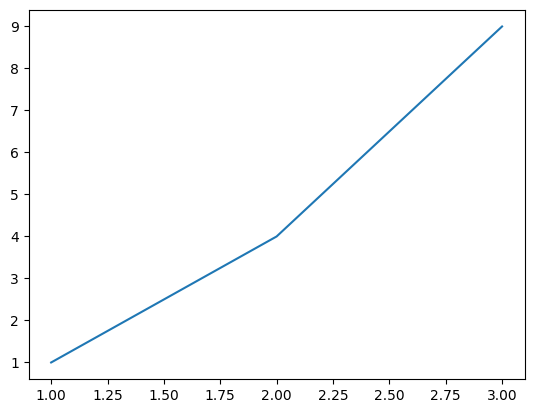

In [2]:
import numpy as np
import matplotlib.pyplot as plt
print("NumPy version:", np.__version__)
plt.plot([1, 2, 3], [1, 4, 9])
plt.show()

Matplotlib imported successfully!


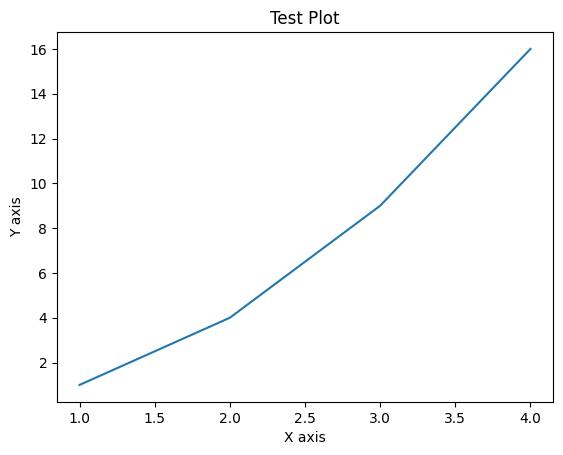

In [3]:
import matplotlib.pyplot as plt
print("Matplotlib imported successfully!")

# Test with a simple plot
plt.plot([1, 2, 3, 4], [1, 4, 9, 16])
plt.title("Test Plot")
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.show()

## 4. Feature Selection & Splitting

We scale the features using StandardScaler and split the data into training and testing sets.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score


## 2. Load Dataset

**Note for Kaggle:** The dataset must be added to the Input directory. Update the path below accordingly.


In [ ]:


DATA_PATH = r"C:\Users\Saniya\Downloads\archive\telemonitoring_parkinsons_updrs.data.csv" 
# You can access the dataset from kaggle - https://www.kaggle.com/datasets/rishidamarla/parkinsons-telemonitoring-data



df = pd.read_csv(DATA_PATH)
print(df.shape)
df.head()
# cat_cols = df.select_dtypes(include='object').columns  


(5875, 22)


,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,1,72,0,5.6431,28.199,34.398,0.00662,0.000034,0.00401,0.00317,...,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,1,72,0,12.6660,28.447,34.894,0.00300,0.000017,0.00132,0.00150,...,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,1,72,0,19.6810,28.695,35.389,0.00481,0.000025,0.00205,0.00208,...,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,1,72,0,25.6470,28.905,35.810,0.00528,0.000027,0.00191,0.00264,...,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,1,72,0,33.6420,29.187,36.375,0.00335,0.000020,0.00093,0.00130,...,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361


## 3. Data Preprocessing

We create a 'severity' classification bin depending on the total_UPDRS score.


In [3]:
df['severity'] = pd.cut(df['total_UPDRS'], bins=[0, 20, 40, 60, 100], labels=[0,1,2,3])


### Check for Missing Values


In [4]:
print(df.isna().sum())


subject#         0
age              0
sex              0
test_time        0
motor_UPDRS      0
total_UPDRS      0
Jitter(%)        0
Jitter(Abs)      0
Jitter:RAP       0
Jitter:PPQ5      0
Jitter:DDP       0
Shimmer          0
Shimmer(dB)      0
Shimmer:APQ3     0
Shimmer:APQ5     0
Shimmer:APQ11    0
Shimmer:DDA      0
NHR              0
HNR              0
RPDE             0
DFA              0
PPE              0
severity         0
dtype: int64


## 4. Feature Selection & Splitting

We scale the features using StandardScaler and split the data into training and testing sets.


In [ ]:
X = df.drop("severity", axis=1)  
y = df["severity"]        

le = LabelEncoder()
y_encoded = le.fit_transform(y)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_encoded, test_size=0.3, random_state=42
)

Euclidean: Straight-line distance

Manhattan: Block or city-road distance

Chebyshev: Maximum coordinate difference

Minkowski: Generalized distance formula

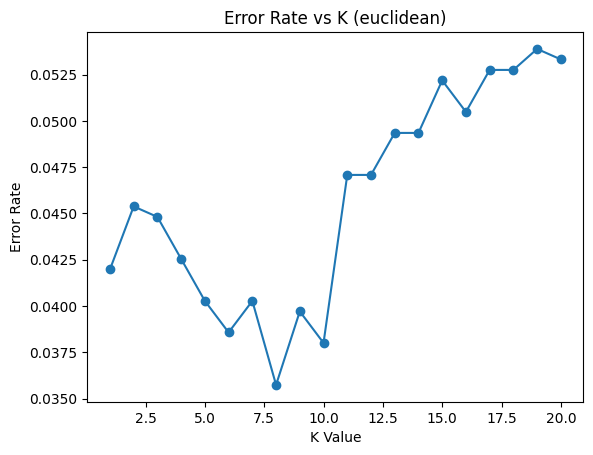

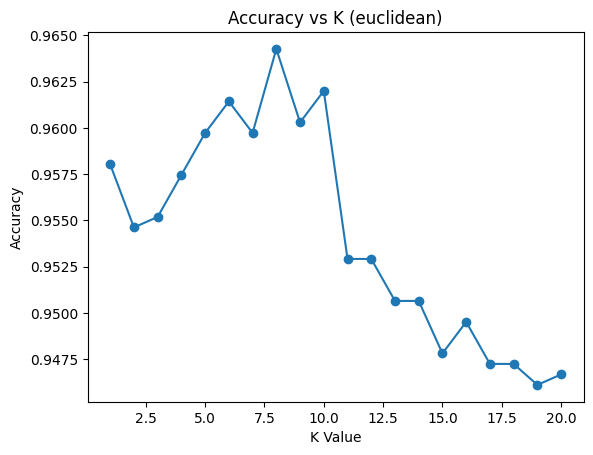

✅ Best K for euclidean: 8 with Accuracy: 0.9643


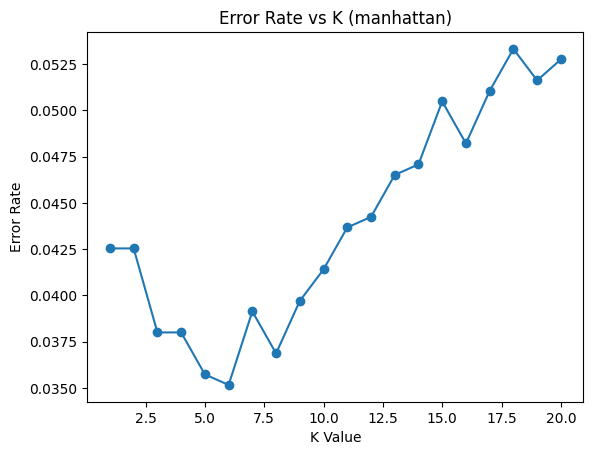

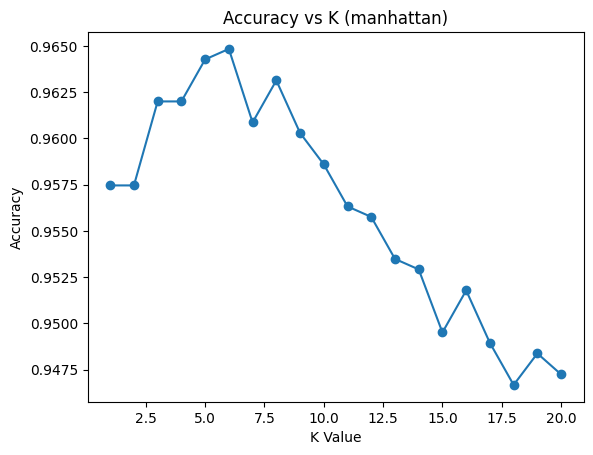

✅ Best K for manhattan: 6 with Accuracy: 0.9648


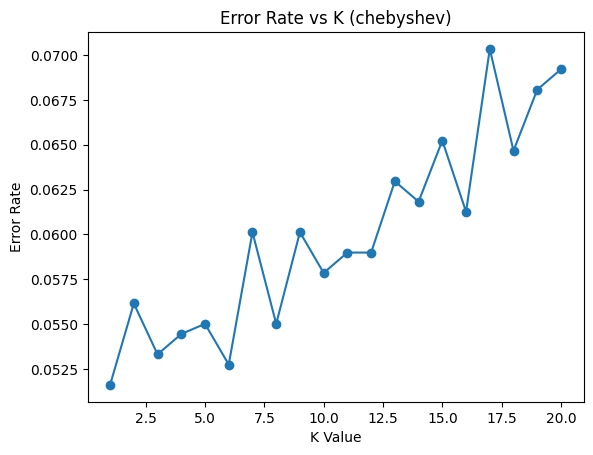

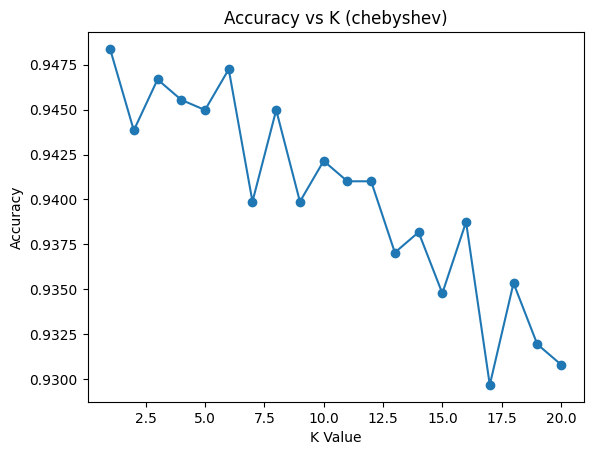

✅ Best K for chebyshev: 1 with Accuracy: 0.9484


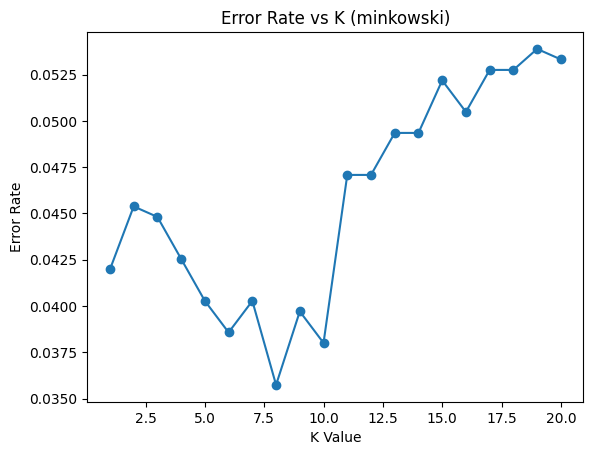

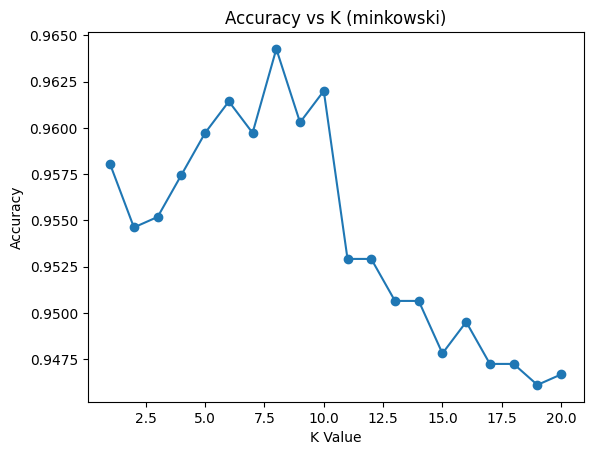

✅ Best K for minkowski: 8 with Accuracy: 0.9643


In [6]:
metrics = ["euclidean", "manhattan", "chebyshev", "minkowski"]

for metric in metrics:
    error = []
    accuracy = []
    k_range = range(1, 21)

    for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k, metric=metric)
        knn.fit(X_train, y_train)
        pred = knn.predict(X_test)
        error.append(np.mean(pred != y_test))
        accuracy.append(accuracy_score(y_test, pred))

    plt.plot(k_range, error, marker='o')
    plt.xlabel("K Value")
    plt.ylabel("Error Rate")
    plt.title(f"Error Rate vs K ({metric})")
    plt.show()


    plt.plot(k_range, accuracy, marker='o')
    plt.xlabel("K Value")
    plt.ylabel("Accuracy")
    plt.title(f"Accuracy vs K ({metric})")
    plt.show()

    best_k = k_range[np.argmax(accuracy)]
    best_acc = max(accuracy)
    print(f"✅ Best K for {metric}: {best_k} with Accuracy: {best_acc:.4f}")

In [ ]:
best_overall_k = None
best_overall_metric = None
best_overall_acc = 0

for metric in metrics:
    error = []
    accuracy = []
    k_range = range(1, 21)

    for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k, metric=metric)
        knn.fit(X_train, y_train)
        pred = knn.predict(X_test)
        accuracy.append(accuracy_score(y_test, pred))

    best_k = k_range[np.argmax(accuracy)]
    best_acc = max(accuracy)
    print(f"✅ Best K for {metric}: {best_k} with Accuracy: {best_acc:.4f}")

    if best_acc > best_overall_acc:
        best_overall_acc = best_acc
        best_overall_k = best_k
        best_overall_metric = metric

    print("--------------------------------------------------")
print(f"🌟 Overall Best Metric: {best_overall_metric}")
print(f"🌟 Overall Best K: {best_overall_k}")
print(f"🌟 Overall Best Accuracy: {best_overall_acc:.4f}")

✅ Best K for euclidean: 8 with Accuracy: 0.9643
--------------------------------------------------
✅ Best K for manhattan: 6 with Accuracy: 0.9648
--------------------------------------------------
✅ Best K for chebyshev: 1 with Accuracy: 0.9484
--------------------------------------------------
✅ Best K for minkowski: 8 with Accuracy: 0.9643
--------------------------------------------------
🌟 Overall Best Metric: manhattan
🌟 Overall Best K: 6
🌟 Overall Best Accuracy: 0.9648


In [ ]:
best_k = 6  

for metric in ["euclidean", "manhattan", "chebyshev", "minkowski"]:
    knn = KNeighborsClassifier(n_neighbors=best_k, metric=metric)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    print(f"Metric: {metric}")
    print("Accuracy:", accuracy_score(y_test, pred))
    print(classification_report(y_test, pred))
    print("-"*50)


Metric: euclidean
Accuracy: 0.9614293817356778
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       389
           1       0.96      0.98      0.97      1064
           2       0.96      0.93      0.95       310

    accuracy                           0.96      1763
   macro avg       0.96      0.95      0.96      1763
weighted avg       0.96      0.96      0.96      1763

--------------------------------------------------
Metric: manhattan
Accuracy: 0.9648326715825298
              precision    recall  f1-score   support

           0       0.97      0.96      0.96       389
           1       0.96      0.98      0.97      1064
           2       0.96      0.93      0.94       310

    accuracy                           0.96      1763
   macro avg       0.97      0.95      0.96      1763
weighted avg       0.96      0.96      0.96      1763

--------------------------------------------------
Metric: chebyshev
Accuracy: 0.947249007373

In [22]:
%pip install seaborn


  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Note: you may need to restart the kernel to use updated packages.


## 5. Model Training & Evaluation

We train the final KNN model using the best hyperparameters found.


Final Model: K=6, Metric='euclidean'
Final Accuracy: 0.9614293817356778

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       389
           1       0.96      0.98      0.97      1064
           2       0.96      0.93      0.95       310

    accuracy                           0.96      1763
   macro avg       0.96      0.95      0.96      1763
weighted avg       0.96      0.96      0.96      1763



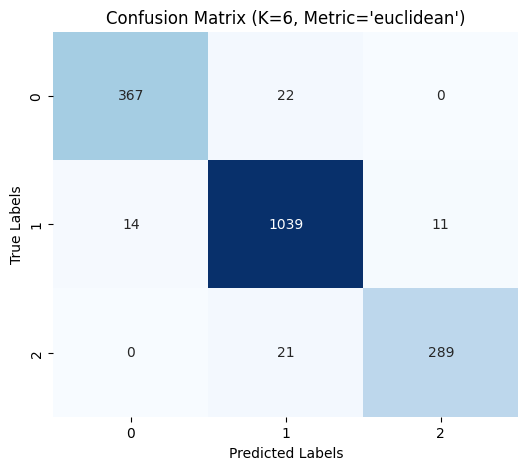

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

best_metric = "manhattan"  # change this if another metric gave higher accuracy


final_model = KNeighborsClassifier(n_neighbors=best_k, metric=best_metric)
final_model.fit(X_train, y_train)
final_pred = final_model.predict(X_test)

print(f"Final Model: K={best_k}, Metric='{best_metric}'")
print("Final Accuracy:", accuracy_score(y_test, final_pred))
print("\nClassification Report:")
print(classification_report(y_test, final_pred))

cm = confusion_matrix(y_test, final_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title(f"Confusion Matrix (K={best_k}, Metric='{best_metric}')")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()
